In [76]:
import scipy.integrate as inte 
import numpy as np 
import math 
from random import uniform
import matplotlib.pyplot as plt
import corner

<ErrorbarContainer object of 3 artists>

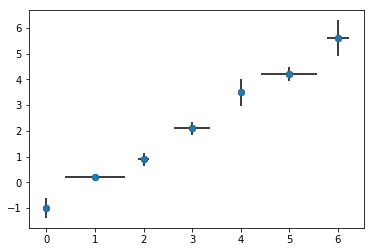

In [77]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([-1, 0.2, 0.9, 2.1, 3.5, 4.2, 5.6])
x_err=np.random.normal(0,0.3,len(x))  #(media,sigma,numero de datos)
y_err=np.random.normal(0,0.4,len(y))
plt.plot(x,y,'o',color='black')
plt.errorbar(x,y,yerr=y_err,xerr=x_err, fmt='o',ecolor='black')

In [78]:
def modelo(x,a,b):   #se define una funcion y que depende de las variables x,a,b
    return a*x+b    #se escribe la forma de la funcion

In [79]:
def chicuad(a,b):
    chi = (((y-modelo(x,a,b))**2)/y_err**2).sum() 
    return chi

In [80]:
def MCmc(a0,b0,ancho_a,ancho_b,puntos):
    alist=[]
    blist=[]
    alist.append(a0) 
    blist.append(b0)
    aceptados=0
    for a in range(puntos):
        olda0=alist[-1]
        oldb0=blist[-1]
        newpoint1=np.random.normal(olda0,ancho_a)
        newpoint2=np.random.normal(oldb0,ancho_b)
#  print "nuevo punto=",newpoint1,newpoint2
        ratio=chicuad(olda0,oldb0)-chicuad(newpoint1,newpoint2)
#    print ("radio=",ratio)
        if ratio > 0:
            alist.append(newpoint1)
            blist.append(newpoint2)
            aceptados+=1
        else:
            e=math.exp(ratio/2)
            ale=np.random.uniform(0.0,1.0)
            if e > ale:
                alist.append(newpoint1)
                blist.append(newpoint2)
                aceptados+=1
            else:
                alist.append(olda0)
                blist.append(oldb0)
                
    alist = np.array(alist)
    blist = np.array(blist)
    totales=puntos
    print ("aceptados=",aceptados,"totales=",totales)
    print (alist)
 #   print (blist)
    return alist, blist

In [114]:
caminador=10
a0=0.3
b0=0.1
pen=[]
orde=[]
for i in range(caminador):
    if (i==0):
        aini=a0
        bini=b0
    elif (i>=1):
        aini=np.random.uniform(0,2,1)
        bini=np.random.uniform(0,2,1)
    pen, orde = MCmc(aini,bini,0.07,0.05,10000) 
#    return pen, orde

aceptados= 4879 totales= 10000
[0.3        0.38902655 0.4376055  ... 1.08360825 1.12779838 1.12779838]
aceptados= 4759 totales= 10000
[[0.41609886]
 [0.41609886]
 [0.41609886]
 ...
 [0.92033124]
 [0.92033124]
 [0.86525287]]
aceptados= 4898 totales= 10000
[[0.44634905]
 [0.40306372]
 [0.40306372]
 ...
 [1.06906957]
 [0.99175443]
 [0.99175443]]
aceptados= 4844 totales= 10000
[[0.40319741]
 [0.40319741]
 [0.45083932]
 ...
 [0.95405515]
 [0.97554988]
 [0.97554988]]
aceptados= 4835 totales= 10000
[[1.3690959 ]
 [1.29626197]
 [1.15128092]
 ...
 [0.98106742]
 [0.91385545]
 [0.96818809]]
aceptados= 4948 totales= 10000
[[1.68053839]
 [1.68053839]
 [1.68053839]
 ...
 [0.95504075]
 [0.95504075]
 [0.98224309]]
aceptados= 4874 totales= 10000
[[1.87305971]
 [1.87305971]
 [1.86451122]
 ...
 [1.03492277]
 [1.02716794]
 [1.02716794]]
aceptados= 4855 totales= 10000
[[1.31744998]
 [1.27194922]
 [1.27194922]
 ...
 [0.95062629]
 [0.95062629]
 [0.95062629]]
aceptados= 4847 totales= 10000
[[1.46971094]
 [1.4

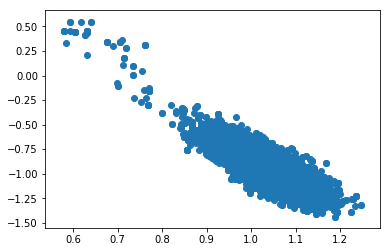

In [115]:
plt.scatter(pen, orde)

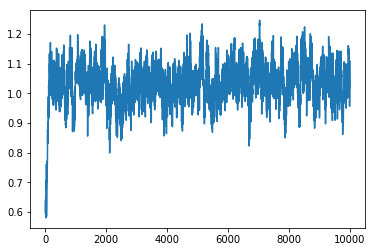

In [116]:
plt.plot(pen)

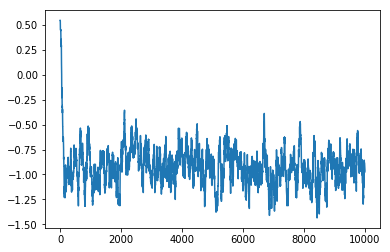

In [117]:
plt.plot(orde)

In [118]:
alist1, blist1 = MCmc(0.3,0.1,0.07,0.05,10000)

aceptados= 4838 totales= 10000
[0.3        0.32236717 0.5177968  ... 0.97352361 0.97352361 1.00308567]


In [119]:
alist2, blist2 = MCmc(0.9,1.1,0.07,0.05,10000)

aceptados= 4903 totales= 10000
[0.9        0.9        0.9        ... 1.06634734 1.06634734 1.10648327]


In [120]:
alist3, blist3 = MCmc(1.5,-2.1,0.07,0.05,10000)

aceptados= 4916 totales= 10000
[1.5        1.45155724 1.43399101 ... 1.08721813 1.08721813 1.07885081]


Text(0,0.5,'b')

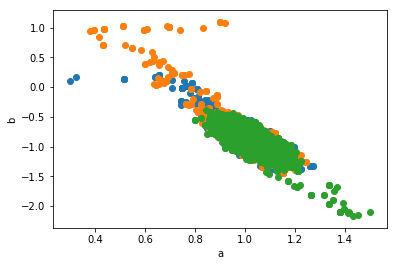

In [121]:
plt.scatter(alist1, blist1)
plt.scatter(alist2, blist2)
plt.scatter(alist3, blist3)
plt.xlabel('a')
plt.ylabel('b')

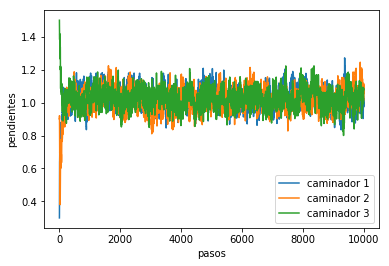

In [122]:
plt.plot(alist1, label='caminador 1')
plt.plot(alist2, label='caminador 2')
plt.plot(alist3, label='caminador 3')
plt.xlabel('pasos')
plt.ylabel('pendientes')
plt.legend()

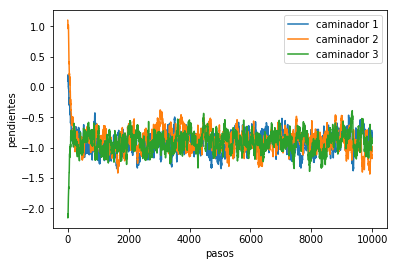

In [123]:
plt.plot(blist1, label='caminador 1')
plt.plot(blist2, label='caminador 2')
plt.plot(blist3, label='caminador 3')
plt.xlabel('pasos')
plt.ylabel('pendientes')
plt.legend()

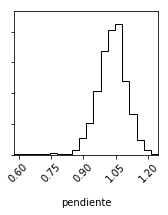

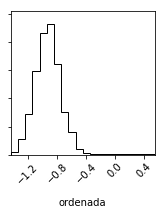

In [133]:
#plt.clf()
#datos=np.vstack((pen,orde))
corner.corner(pen, labels=['pendiente'])
corner.corner(orde, labels=['ordenada'])

plt.show()